# Regression models for predicting solubility

Predicting solubility using sklearn's following regression models:
- Linear Regression
- Random Forest
- Gradient Boosting
- Support Vector Machine

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# loading dataset as pandas dataframe
df = pd.read_csv('curated_aqsoldb.csv')

##### Using descriptors based on Delaney's method - MolLogP, MolWt, NumRotatableBonds, AromaticProportion (AP) (https://pubmed.ncbi.nlm.nih.gov/15154768/)

Note: From my own EDA, I have found that MolLogP and MolWt have a much larger correlation to solubility that NumRotatableBonds and AromaticProportion

In [3]:
# creating X matrix from descriptors chosen
X = df[['MolLogP', 'MolWt', 'NumRotatableBonds', 'AP']]
X

,MolLogP,MolWt,NumRotatableBonds,AP
0,3.95810,392.510,17.0,0.000000
1,2.40550,169.183,0.0,0.769231
2,2.15250,140.569,1.0,0.666667
3,8.11610,756.226,10.0,0.679245
4,2.48540,422.525,12.0,0.387097
...,...,...,...,...
9977,2.61700,264.369,8.0,0.315789
9978,-0.21440,444.440,2.0,0.187500
9979,2.82402,150.221,1.0,0.545455
9980,5.09308,454.611,13.0,0.363636


In [4]:
# creating Y matrix from Solubility values
Y = df['Solubility']

In [5]:
# split dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y)

### Linear Regression

In [6]:
from sklearn import linear_model

In [7]:
# build linear regresson model
regr = linear_model.LinearRegression()

# fit model using training set
regr.fit(x_train, y_train)

LinearRegression()

In [8]:
# intercept value
regr.intercept_

-0.9848949745084892

In [9]:
# gradient value
regr.coef_

array([-0.40199157, -0.00461245,  0.08150825, -0.68156164])

In [10]:
# predict solubility values using the test set
regr_y_predict = regr.predict(x_test)

In [11]:
regr.score(x_train, y_train)

0.4762454961059013

In [12]:
regr.score(x_test, y_test)

0.36588162341690544

In [13]:
mean_squared_error(y_test, regr_y_predict)

# shows there is a high measure of error

3.503321183332598

In [14]:
r2_score(y_test, regr_y_predict)

# shows poor goodness of fit

0.36588162341690544

[Text(0.5, 1.0, 'Multiple linear regression for predicting solubility'),
 Text(0.5, 0, 'experimental solubility values'),
 Text(0, 0.5, 'predicted solubility values')]

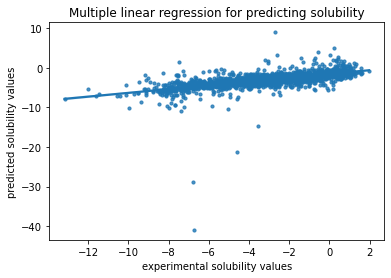

In [15]:
sns.regplot(x=y_test, y=regr_y_predict, scatter_kws={"s": 10}).set(title='Multiple linear regression for predicting solubility', xlabel='experimental solubility values', ylabel='predicted solubility values')
# plt.savefig('mlr_delaney.jpg', bbox_inches='tight')

### Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
# build random forest regresson model
rf = RandomForestRegressor()

# fit model using training set
rf.fit(x_train, y_train)

RandomForestRegressor()

In [18]:
# solubility values predicted using test labels
rf_y_predict = rf.predict(x_test)

In [19]:
rf.score(x_test, y_test)

0.7019530431527601

In [20]:
rf.score(x_train, y_train)

0.9550427919199314

[Text(0.5, 1.0, 'Random forest regression for predicting solubility'),
 Text(0.5, 0, 'experimental solubility values'),
 Text(0, 0.5, 'predicted solubility values')]

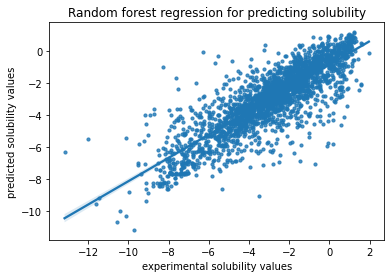

In [21]:
sns.regplot(x=y_test, y=rf_y_predict, scatter_kws={"s": 10}).set(title='Random forest regression for predicting solubility', xlabel='experimental solubility values', ylabel='predicted solubility values')

### Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
# build gradient boosting regressor model
gb = GradientBoostingRegressor()

# fit model using training set
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [24]:
# solubility values predicted using test labels
gb_y_predict = gb.predict(x_test)

In [25]:
gb.score(x_test, y_test)

0.6952665326179372

In [26]:
gb.score(x_train, y_train)

0.7227702171272491

[Text(0.5, 1.0, 'Gradient boosting regression for predicting solubility'),
 Text(0.5, 0, 'experimental solubility values'),
 Text(0, 0.5, 'predicted solubility values')]

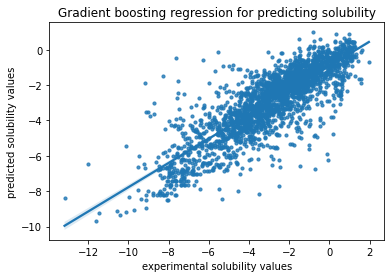

In [27]:
sns.regplot(x=y_test, y=gb_y_predict, scatter_kws={"s": 10}).set(title='Gradient boosting regression for predicting solubility', xlabel='experimental solubility values', ylabel='predicted solubility values')

### Support Vector Machine

In [28]:
from sklearn.svm import SVR

In [29]:
# build svm regresson model
svm = SVR()

# fit model using training set
svm.fit(x_train, y_train)

SVR()

In [30]:
# solubility values predicted using test labels
svm_y_predict = svm.predict(x_test)

In [31]:
svm.score(x_test, y_test)

0.4187744565035343

In [32]:
svm.score(x_train, y_train)

0.4385320336192434

[Text(0.5, 1.0, 'Support vector regression for predicting solubility'),
 Text(0.5, 0, 'experimental solubility values'),
 Text(0, 0.5, 'predicted solubility values')]

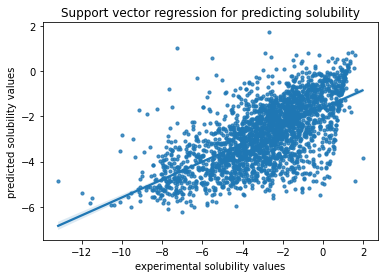

In [33]:
sns.regplot(x=y_test, y=svm_y_predict, scatter_kws={"s": 10}).set(title='Support vector regression for predicting solubility', xlabel='experimental solubility values', ylabel='predicted solubility values')